### Preprocessing Rainfall Data

This notebook processes rainfall data collected at 15-minute intervals by:
- Cleaning and converting time and value data;
- Exploring quality categories;
- Resampling to hourly averages;
- Visualising distributions and correlations;
- Engineering features like cumulative rainfall;
- Saving the output for machine learning.

In [0]:
#Imports all modules and libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [0]:
#CSV into a new DataFrame which can be replicated for the other datasets.
df = pd.read_csv(os.path.join("Data", "West-Sedgemoor_15min-total-Rainfall--mm--time-series-for-West-Sedgemoor.csv")) 
df

,measure,dateTime,date,value,completeness,quality,qcode
0,http://environment.data.gov.uk/hydrology/id/me...,1999-06-20T00:30:00,1999-06-20,0.2,Incomplete,Good,NaN
1,http://environment.data.gov.uk/hydrology/id/me...,1999-06-27T05:15:00,1999-06-27,0.2,Incomplete,Good,NaN
2,http://environment.data.gov.uk/hydrology/id/me...,1999-08-26T00:30:00,1999-08-26,1.2,Incomplete,Good,NaN
3,http://environment.data.gov.uk/hydrology/id/me...,1999-09-11T21:15:00,1999-09-11,1.0,Incomplete,Good,NaN
4,http://environment.data.gov.uk/hydrology/id/me...,1999-09-29T19:00:00,1999-09-29,2.0,Incomplete,Good,NaN
...,...,...,...,...,...,...,...
902137,http://environment.data.gov.uk/hydrology/id/me...,2025-03-09T01:30:00,2025-03-09,0.0,NaN,Unchecked,NaN
902138,http://environment.data.gov.uk/hydrology/id/me...,2025-03-09T01:45:00,2025-03-09,0.0,NaN,Unchecked,NaN
902139,http://environment.data.gov.uk/hydrology/id/me...,2025-03-12T07:30:00,2025-03-12,0.0,NaN,Unchecked,NaN
902140,http://environment.data.gov.uk/hydrology/id/me...,2025-03-12T07:45:00,2025-03-12,0.0,NaN,Unchecked,NaN


In [0]:
#Checking the data types - dateTime needs to be set as a date and time. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902142 entries, 0 to 902141
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   measure       902142 non-null  object 
 1   dateTime      902142 non-null  object 
 2   date          902142 non-null  object 
 3   value         887508 non-null  float64
 4   completeness  892579 non-null  object 
 5   quality       902142 non-null  object 
 6   qcode         0 non-null       float64
dtypes: float64(2), object(5)
memory usage: 48.2+ MB


In [0]:
print(df.head())  # First 5 rows
print(df.tail())  # Last 5 rows


                                             measure  ... qcode
0  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
1  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
2  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
3  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
4  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN

[5 rows x 7 columns]
                                                  measure  ... qcode
902137  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
902138  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
902139  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
902140  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN
902141  http://environment.data.gov.uk/hydrology/id/me...  ...   NaN

[5 rows x 7 columns]


In [0]:
#Delete columns which are not needed or are NaN.
df = df.drop(columns=['qcode', 'completeness'])
df

,measure,dateTime,date,value,quality
0,http://environment.data.gov.uk/hydrology/id/me...,1999-06-20T00:30:00,1999-06-20,0.2,Good
1,http://environment.data.gov.uk/hydrology/id/me...,1999-06-27T05:15:00,1999-06-27,0.2,Good
2,http://environment.data.gov.uk/hydrology/id/me...,1999-08-26T00:30:00,1999-08-26,1.2,Good
3,http://environment.data.gov.uk/hydrology/id/me...,1999-09-11T21:15:00,1999-09-11,1.0,Good
4,http://environment.data.gov.uk/hydrology/id/me...,1999-09-29T19:00:00,1999-09-29,2.0,Good
...,...,...,...,...,...
902137,http://environment.data.gov.uk/hydrology/id/me...,2025-03-09T01:30:00,2025-03-09,0.0,Unchecked
902138,http://environment.data.gov.uk/hydrology/id/me...,2025-03-09T01:45:00,2025-03-09,0.0,Unchecked
902139,http://environment.data.gov.uk/hydrology/id/me...,2025-03-12T07:30:00,2025-03-12,0.0,Unchecked
902140,http://environment.data.gov.uk/hydrology/id/me...,2025-03-12T07:45:00,2025-03-12,0.0,Unchecked


In [0]:
#Change the column 'dateTime' so that is is in datetime format.
df['dateTime'] = pd.to_datetime(df['dateTime'])

In [0]:
#Filter the dataset to keep only data from 2019 onwards
df = df[df['dateTime'] >= '2019-01-01']

#Display the first few rows to confirm the change
print(df.head())

                                                  measure  ... quality
684958  http://environment.data.gov.uk/hydrology/id/me...  ...    Good
684959  http://environment.data.gov.uk/hydrology/id/me...  ...    Good
684960  http://environment.data.gov.uk/hydrology/id/me...  ...    Good
684961  http://environment.data.gov.uk/hydrology/id/me...  ...    Good
684962  http://environment.data.gov.uk/hydrology/id/me...  ...    Good

[5 rows x 5 columns]


In [0]:
#Check that dateTime is now datetime format.
print(df.dtypes)

measure             object
dateTime    datetime64[ns]
date                object
value              float64
quality             object
dtype: object


In [0]:
#Explore the number of nulls.
print(df.isna().sum())

measure      0
dateTime     0
date         0
value       54
quality      0
dtype: int64


In [0]:
#Drop nulls.
df.dropna(subset=['value'], inplace=True)

/root/.ipykernel/1762011/command-1932511080885074-718005360:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['value'], inplace=True)


In [0]:
#Check the shape of the data.
print(df.shape)

(217130, 5)


In [0]:
#Explore the number of duplicates.
print(df.duplicated().sum())

0


In [0]:
#Sort the DataFrame by the 'DateTime' column and reset the index so that it is easier to use for further exploration. 
df = df.sort_values('dateTime').reset_index(drop=True)

## Exploratory Data Analysis
Below we examine the distribution of values and quality flags to evaluate data reliability.


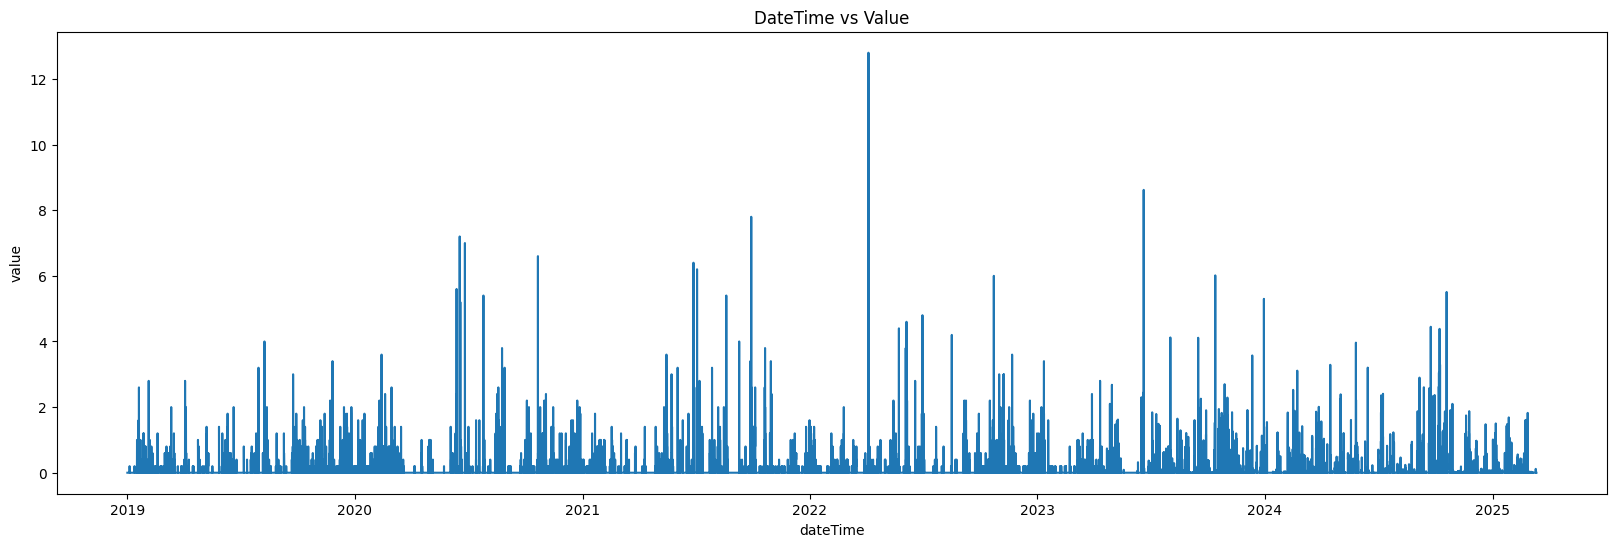

In [0]:
#Create a line plot.
plt.figure(figsize=(20, 6))
plt.plot(df['dateTime'], df['value'])
plt.xlabel('dateTime')
plt.ylabel('value')
plt.title('DateTime vs Value')
plt.show()


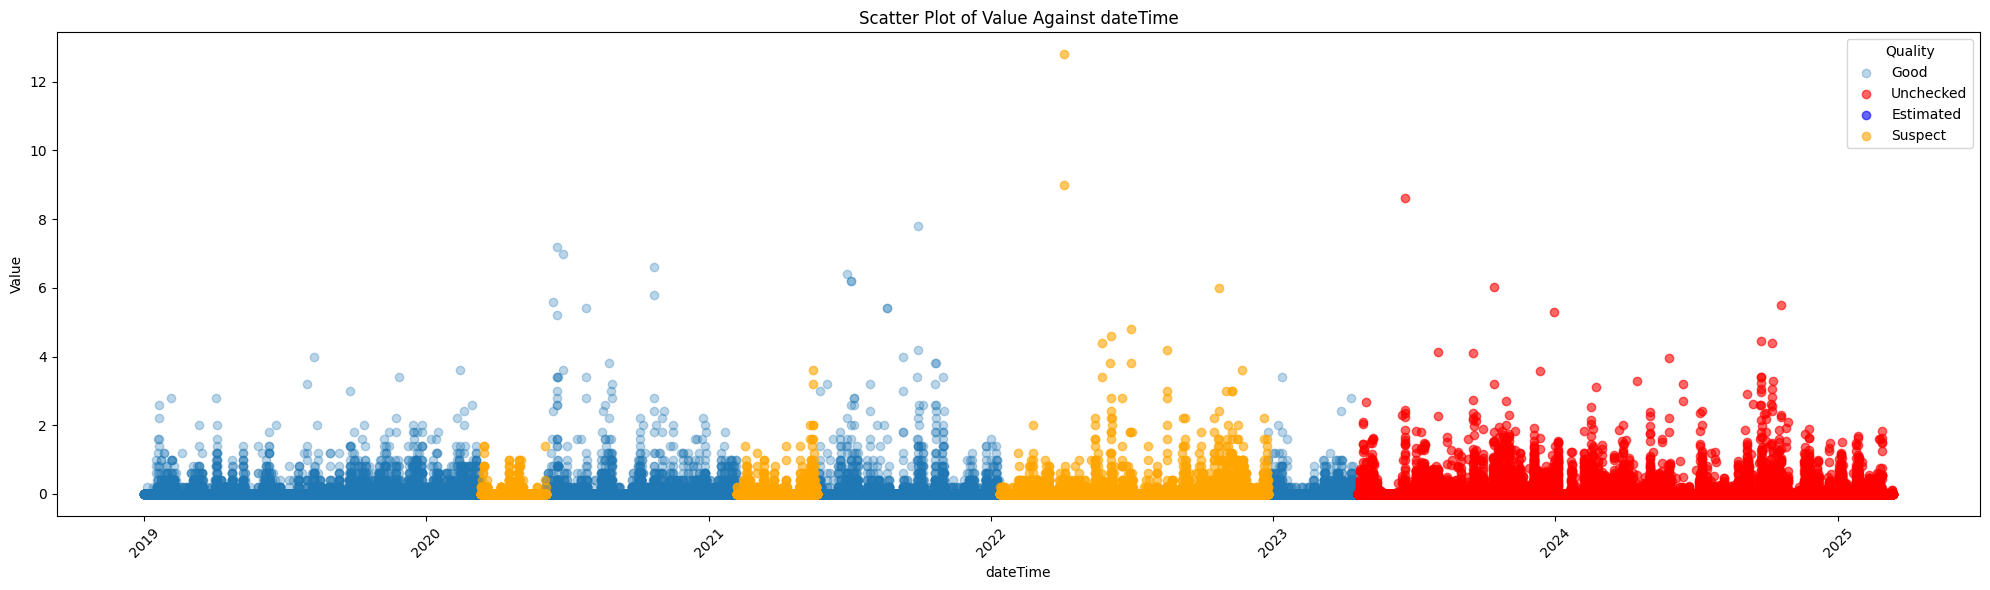

In [0]:
#Create a plot of the 'value' column for each quality type.
plt.figure(figsize=(20, 6))

#Good data
good_data = df[df['quality'] == 'Good']
plt.scatter(good_data['dateTime'], good_data['value'], alpha=0.3, label='Good')

#Unchecked
unchecked_data = df[df['quality'] == 'Unchecked']
plt.scatter(unchecked_data['dateTime'], unchecked_data['value'], color='red', alpha=0.6, label='Unchecked')

#Estimated
estimated_data = df[df['quality'] == 'Estimated']
plt.scatter(estimated_data['dateTime'], estimated_data['value'], color='blue', alpha=0.6, label='Estimated')

#Suspect
suspect_data = df[df['quality'] == 'Suspect']
plt.scatter(suspect_data['dateTime'], suspect_data['value'], color='orange', alpha=0.6, label='Suspect')

plt.title('Scatter Plot of Value Against dateTime')
plt.xlabel('dateTime')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Quality', loc='upper right')
plt.tight_layout()
plt.show()

#Even though some of this is marked as 'Suspect' the data at the boundaries of this quality looks like a match for the observed trend as it moves into 'Good' data and the general distribution of the 'Suspect' and 'Unchecked' data seems to match the 'Good' data.

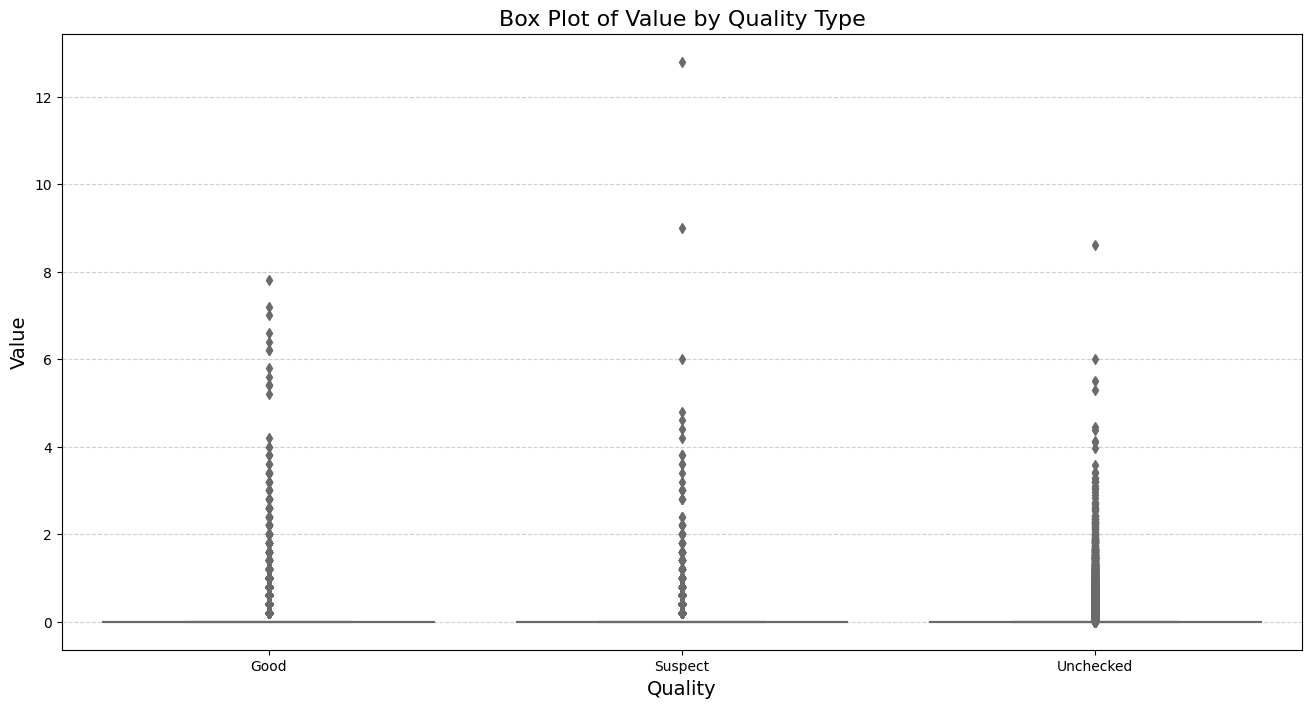

In [0]:

#Create a box plot for each quality type.
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='quality', y='value', palette="Set3")
plt.title('Box Plot of Value by Quality Type', fontsize=16)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#The box plot shows the value types have a small interquartile range and many high outliers in each category - the highest outlier being in the 'Suspect' quality type. The distributions appear similar across categories, suggesting no major quality-based differences.


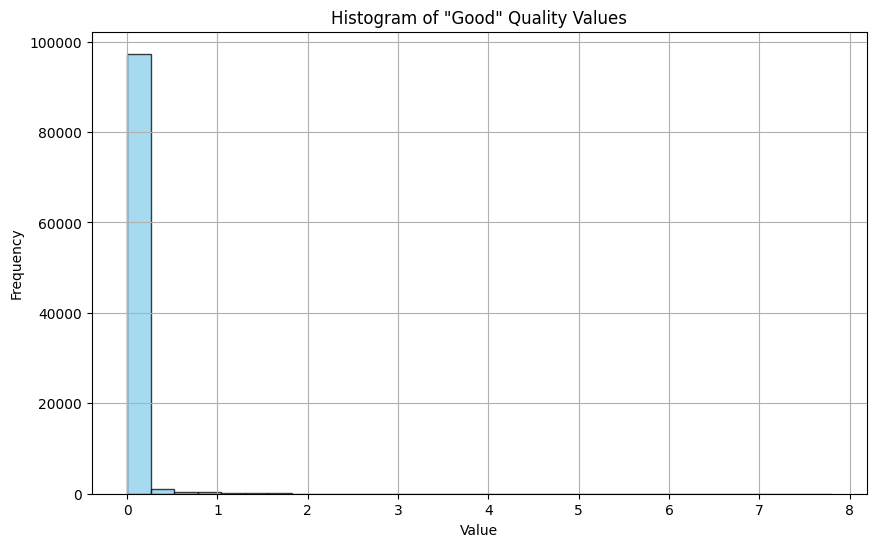

In [0]:
#Filter the DataFrame for 'Good' quality values only and make a histogram.
df_good = df[df['quality'] == 'Good']
plt.figure(figsize=(10, 6))
plt.hist(df_good['value'], bins=30, color='skyblue', edgecolor='black', alpha=0.75)
plt.title('Histogram of "Good" Quality Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#The data is heavily right skewed.


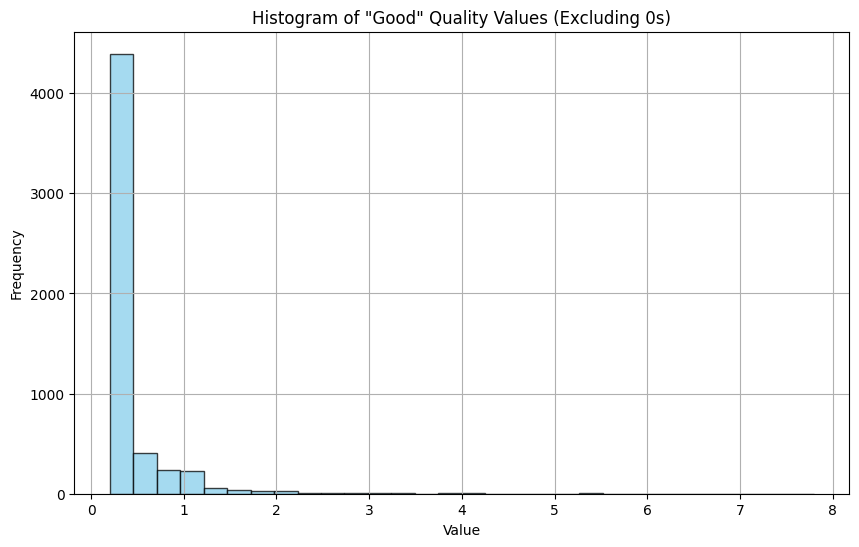

In [0]:
#Filter the DataFrame for 'Good' quality values and values more than 0 and make a histogram.
df_good = df[(df['quality'] == 'Good') & (df['value'] != 0)]
plt.figure(figsize=(10, 6))
plt.hist(df_good['value'], bins=30, color='skyblue', edgecolor='black', alpha=0.75)
plt.title('Histogram of "Good" Quality Values (Excluding 0s)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Even without '0' values. the data is heavily right skewed.

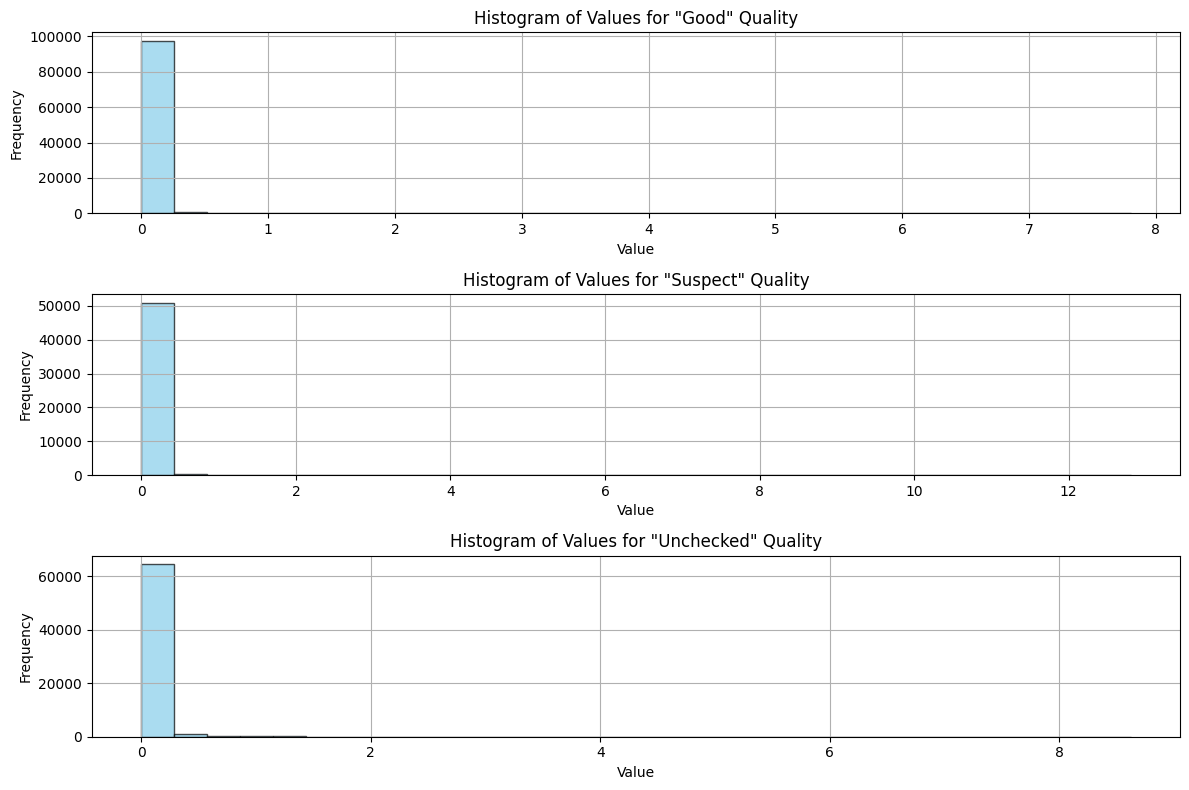

In [0]:
#Create histograms of each quality type. 

#Get unique quality categories.
quality_types = df['quality'].unique()

#Create subplots for each quality type.
plt.figure(figsize=(12, 8))
for i, quality in enumerate(quality_types, 1):
    plt.subplot(len(quality_types), 1, i)  
    df_subset = df[df['quality'] == quality]
    plt.hist(df_subset['value'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Values for "{quality}" Quality')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

#The data is heavily right skewed.

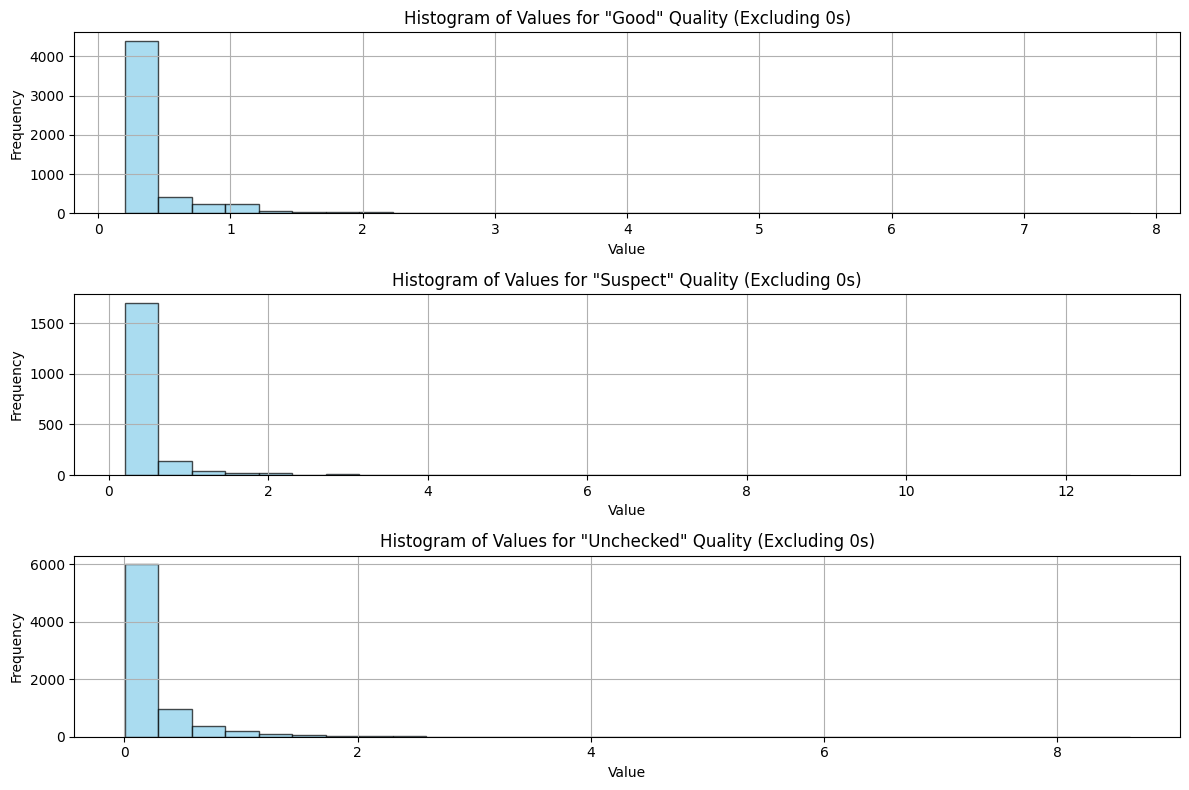

In [0]:
#Create histograms of each quality type, removing any 0 values.

# Create subplots for each quality type
plt.figure(figsize=(12, 8))
for i, quality in enumerate(quality_types, 1):
    df_subset = df[(df['quality'] == quality) & (df['value'] != 0)]  # Exclude zero values
    plt.subplot(len(quality_types), 1, i)  # Create a separate subplot for each quality type
    plt.hist(df_subset['value'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Values for "{quality}" Quality (Excluding 0s)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

#Even without '0' values. the data is heavily right skewed.


In [0]:
#Explore the number of nulls in each column. 
print(df.isnull().sum())

measure     0
dateTime    0
date        0
value       0
quality     0
dtype: int64


In [0]:

#Create a table of summary statistics per quality type.

#Ensure 'value' column is numeric and drop NaNs
df = df.copy()
df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert to numeric, coerce errors to NaN
df = df.dropna(subset=['value'])  # Drop NaNs in 'value'

#Group by 'quality' and calculate statistics
stats_df = df.groupby('quality')['value'].agg(
    average='mean',
    median='median',
    mode=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    std_dev='std',
    count='count'
).reset_index()

stats_df

#The median and mode values are consistently 0.0 across all quality categories, reinforcing the idea that a significant portion of the dataset consists of zero values. The average values are relatively low across all categories, with "Unchecked" data having the highest mean (0.027038) and "Suspect" data having the lowest (0.015868). The standard deviations are also small, indicating low overall variability in the data. The count column shows that most data points fall under the "Good" category (89,358 entries), followed by "Unchecked" (68,408), and then "Suspect" (51,385). Given the similarity of 'Suspect' data to 'Good' and 'Unchecked', combined with the strong left-skew of the distribution, removing outliers would disproportionately affect the dataset and introduce missing values. This would require time-based interpolation, which could distort trends and create unrealistic estimates. Retaining the full dataset ensures data integrity, avoids artificial distortions, and preserves all meaningful extreme values for analysis.

,quality,average,median,mode,std_dev,count
0,Good,0.022581,0.0,0.0,0.149826,99356
1,Suspect,0.015696,0.0,0.0,0.137140,51365
2,Unchecked,0.027038,0.0,0.0,0.157295,66409


In [0]:
#Resample the data to hourly intervals and compute the mean value.
df_hourly = df.resample('H', on='dateTime').agg({'value': 'mean'}).reset_index()
df_hourly


,dateTime,value
0,2019-01-01 00:00:00,0.0
1,2019-01-01 01:00:00,0.0
2,2019-01-01 02:00:00,0.0
3,2019-01-01 03:00:00,0.0
4,2019-01-01 04:00:00,0.0
...,...,...
54292,2025-03-12 04:00:00,0.0
54293,2025-03-12 05:00:00,0.0
54294,2025-03-12 06:00:00,0.0
54295,2025-03-12 07:00:00,0.0


In [0]:
#Check for nulls.
df_hourly.isnull().sum()

dateTime     0
value       10
dtype: int64

In [0]:
#View the nulls.
print(df_hourly[df_hourly['value'].isnull()])

                 dateTime  value
37690 2023-04-20 10:00:00    NaN
37691 2023-04-20 11:00:00    NaN
37692 2023-04-20 12:00:00    NaN
44407 2024-01-25 07:00:00    NaN
44409 2024-01-25 09:00:00    NaN
44410 2024-01-25 10:00:00    NaN
44411 2024-01-25 11:00:00    NaN
44412 2024-01-25 12:00:00    NaN
44413 2024-01-25 13:00:00    NaN
44414 2024-01-25 14:00:00    NaN


In [0]:

#For the 10 missing values, I will do time based interpolation.

#Set 'dateTime' as the index.
df_hourly.set_index('dateTime', inplace=True)

#Interpolate missing values using time-based interpolation.
df_hourly['value'] = df_hourly['value'].interpolate(method='time')

#Reset index to keep 'dateTime' as a column.
df_hourly = df_hourly.reset_index()

In [0]:
#Check the effect.
df_hourly.isnull().sum()

dateTime    0
value       0
dtype: int64

In [0]:
df_hourly

,dateTime,value
0,2019-01-01 00:00:00,0.0
1,2019-01-01 01:00:00,0.0
2,2019-01-01 02:00:00,0.0
3,2019-01-01 03:00:00,0.0
4,2019-01-01 04:00:00,0.0
...,...,...
54292,2025-03-12 04:00:00,0.0
54293,2025-03-12 05:00:00,0.0
54294,2025-03-12 06:00:00,0.0
54295,2025-03-12 07:00:00,0.0


## Feature Engineering
Below we examine the optimal transformations of rain data to create features for machine learning.


In [0]:
#Load Level data
os.path.join("Data", "Level_Cleaned_Hourly.csv")
level = pd.read_csv("Data/Level_Cleaned_Hourly.csv") 
level

,station,dateTime,value
0,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 00:00:00,2.198
1,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 01:00:00,2.291
2,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 02:00:00,2.293
3,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 03:00:00,2.266
4,7998bf73-641d-4084-b00c-ca6989f2ba2b,2019-12-19 04:00:00,2.229
...,...,...,...
86539,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 19:00:00,2.520
86540,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 20:00:00,2.513
86541,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 21:00:00,2.503
86542,ce5176cf-1523-4dbe-855f-17a0efffbe02,2024-11-24 22:00:00,2.506


In [0]:
#Rename 'value' to 'level'.
level.rename(columns={"value": "level"}, inplace=True)

In [0]:
#Rename 'value' to 'rainfall'.
df_hourly.rename(columns={"value": "rainfall"}, inplace=True)

In [0]:
#Ensure 'dateTime' is in datetime format.
df_hourly['dateTime'] = pd.to_datetime(df_hourly['dateTime'])
level['dateTime'] = pd.to_datetime(level['dateTime'])

#Merge on 'dateTime'.
merged_df = df_hourly.merge(level, on='dateTime', how='inner')

In [0]:
merged_df

,dateTime,rainfall,station,level
0,2019-12-19 00:00:00,0.05000,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.198
1,2019-12-19 00:00:00,0.05000,ce5176cf-1523-4dbe-855f-17a0efffbe02,4.588
2,2019-12-19 01:00:00,0.20000,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.291
3,2019-12-19 01:00:00,0.20000,ce5176cf-1523-4dbe-855f-17a0efffbe02,3.412
4,2019-12-19 02:00:00,0.10000,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.293
...,...,...,...,...
86539,2024-11-24 21:00:00,0.00325,ce5176cf-1523-4dbe-855f-17a0efffbe02,2.503
86540,2024-11-24 22:00:00,0.00000,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.410
86541,2024-11-24 22:00:00,0.00000,ce5176cf-1523-4dbe-855f-17a0efffbe02,2.506
86542,2024-11-24 23:00:00,0.00925,7998bf73-641d-4084-b00c-ca6989f2ba2b,2.385


In [0]:
#Delete columns which are not needed or are NaN.
merged_df = merged_df.drop(columns=['station'])

merged_df

,dateTime,rainfall,level
0,2019-12-19 00:00:00,0.05000,2.198
1,2019-12-19 00:00:00,0.05000,4.588
2,2019-12-19 01:00:00,0.20000,2.291
3,2019-12-19 01:00:00,0.20000,3.412
4,2019-12-19 02:00:00,0.10000,2.293
...,...,...,...
86539,2024-11-24 21:00:00,0.00325,2.503
86540,2024-11-24 22:00:00,0.00000,2.410
86541,2024-11-24 22:00:00,0.00000,2.506
86542,2024-11-24 23:00:00,0.00925,2.385


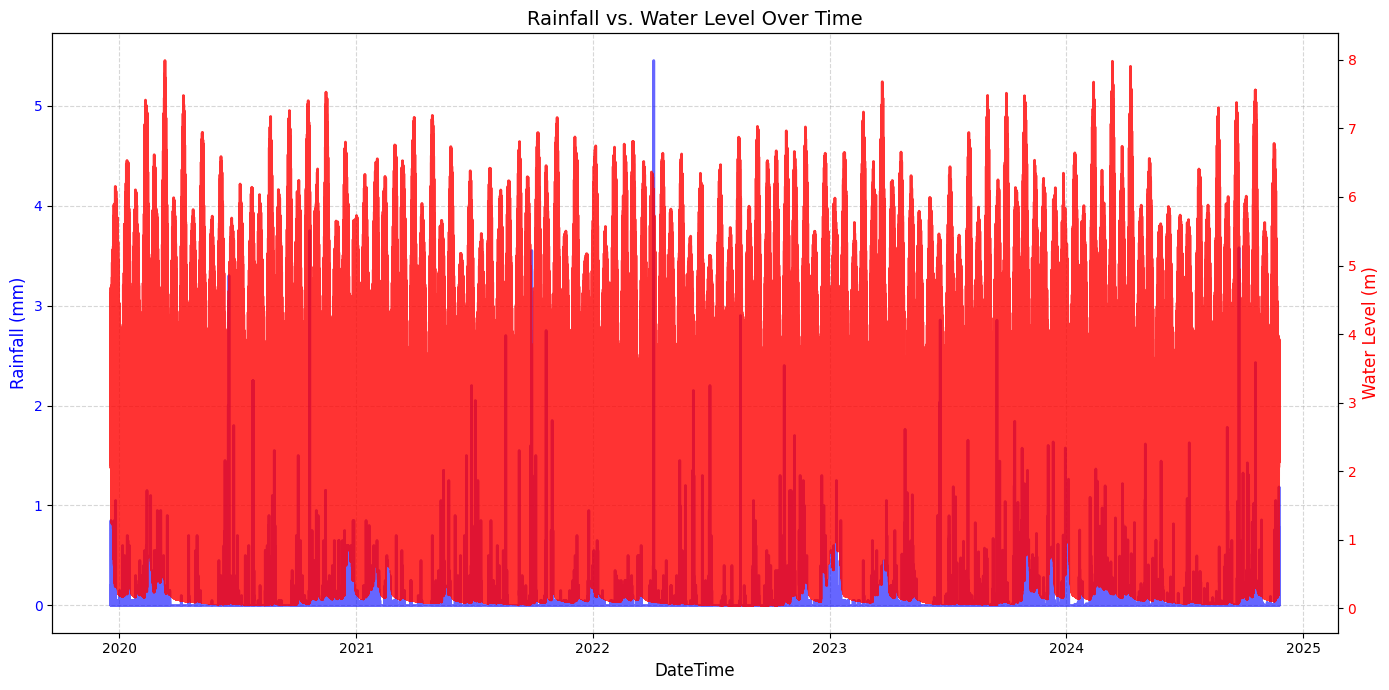

In [0]:
# Ensure 'dateTime' is sorted.
merged_df = merged_df.sort_values(by='dateTime')

#Plot Rainfall with transparency and smooth line
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(merged_df['dateTime'], merged_df['rainfall'], color='blue', label='Rainfall (mm)', alpha=0.6, linewidth=2)
ax1.set_xlabel('DateTime', fontsize=12)
ax1.set_ylabel('Rainfall (mm)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.5)

#Create a second y-axis for Water Level
ax2 = ax1.twinx()
ax2.plot(merged_df['dateTime'], merged_df['level'], color='red', label='Water Level (m)', alpha=0.8, linewidth=2)
ax2.set_ylabel('Water Level (m)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
plt.xticks(rotation=45)

plt.title('Rainfall vs. Water Level Over Time', fontsize=14)
fig.tight_layout()
plt.show()

#It's hard to see the relationship between rainfall and water level in the first graph.

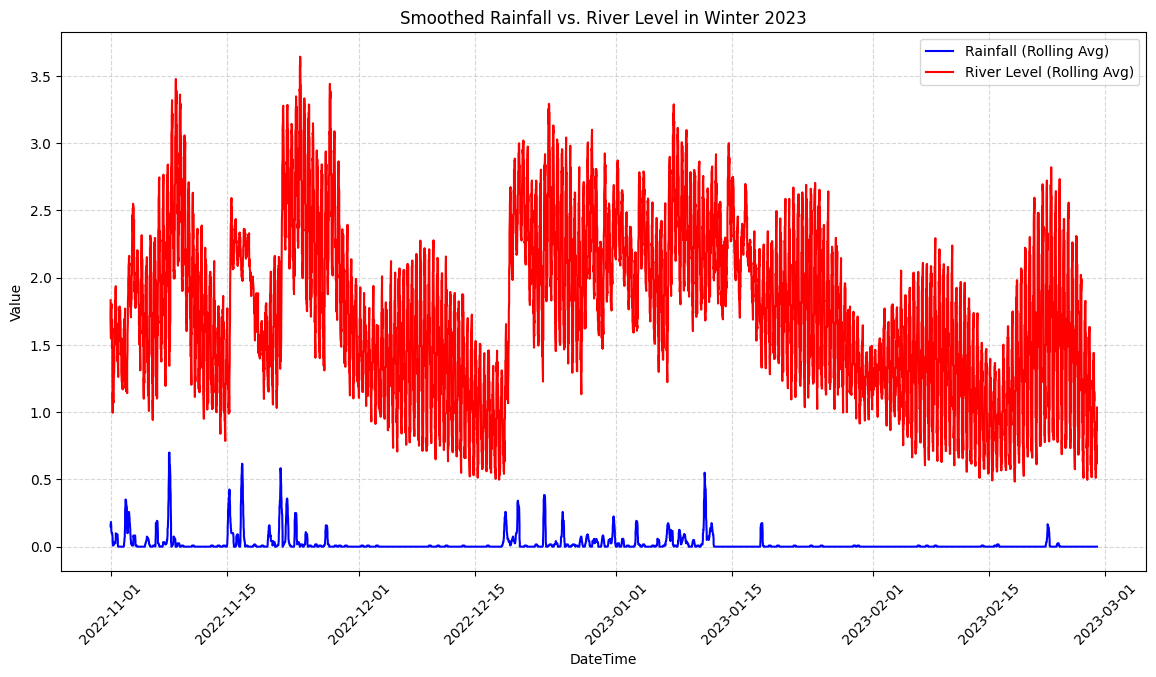

In [0]:

#Calculate rolling averages (window of 12 periods).
merged_df['rainfall_rolling'] = merged_df['rainfall'].rolling(window=12, min_periods=1).mean()
merged_df['level_rolling'] = merged_df['level'].rolling(window=12, min_periods=1).mean()

#Filter data for winter 2023 (January 1, 2023 to February 28, 2023).
winter_2023 = merged_df[(merged_df['dateTime'] >= '2022-11-01') & (merged_df['dateTime'] <= '2023-02-28')]

#Plot the smoothed rainfall and river level for winter 2023.
plt.figure(figsize=(14, 7))
plt.plot(winter_2023['dateTime'], winter_2023['rainfall_rolling'], color='blue', label='Rainfall (Rolling Avg)')
plt.plot(winter_2023['dateTime'], winter_2023['level_rolling'], color='red', label='River Level (Rolling Avg)')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Smoothed Rainfall vs. River Level in Winter 2023')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

#This visual demonstrates a relationship. 

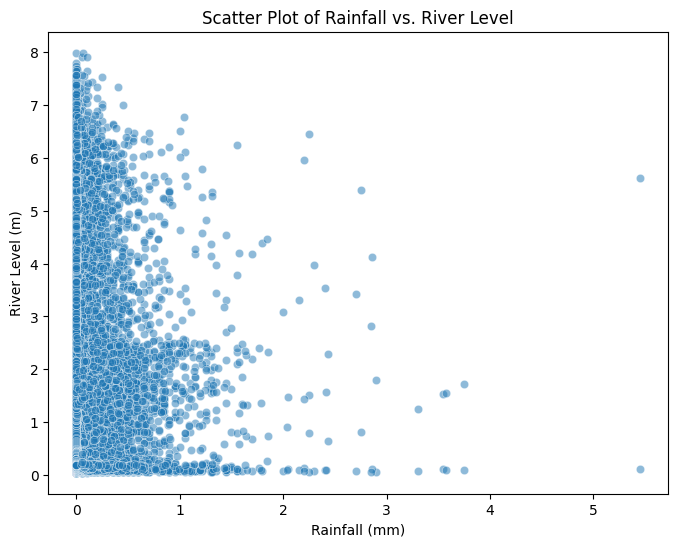

In [0]:
#Create a scatter plot to visualize the relationship between rainfall and river level.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x="rainfall", y="level", alpha=0.5)
plt.xlabel("Rainfall (mm)")
plt.ylabel("River Level (m)")
plt.title("Scatter Plot of Rainfall vs. River Level")
plt.show()

#This visual does not show a strong correlation between rainfall and river level.

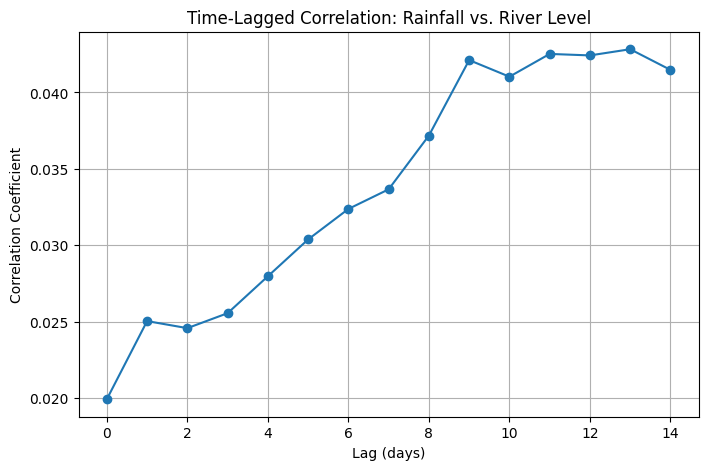

[0.01991665637243661,
 0.02503150865291843,
 0.02456975707618625,
 0.02554915131264163,
 0.02796610951153276,
 0.03037809161290849,
 0.032373213645438235,
 0.03365838226227632,
 0.03717911645753358,
 0.042118011567410144,
 0.04103122218843393,
 0.04252255793843521,
 0.04242476917859705,
 0.042830234816286214,
 0.041477306471814766]

In [0]:
#Check the correlation between rainfall and river level at various lags.

#Define maximum lag days to check.
max_lag = 14 

#Compute correlation for different lags.
lag_correlations = []
for lag in range(max_lag + 1):
    lag_correlations.append(merged_df['rainfall'].shift(lag).corr(merged_df['level']))

#Plot lagged correlation.
plt.figure(figsize=(8, 5))
plt.plot(range(max_lag + 1), lag_correlations, marker='o', linestyle='-')
plt.xlabel("Lag (days)")
plt.ylabel("Correlation Coefficient")
plt.title("Time-Lagged Correlation: Rainfall vs. River Level")
plt.grid()
plt.show()

#Show numerical values.
lag_correlations

#The most correlation was shown at 13 days lag.


In [0]:
#Create cumulative rainfall sums over different periods. I chose more than the fornight identified from the correlation graph as there may be a non-linear relationship that the extra features may allow the model to capture. 
df_hourly['rainfall_cumulative_12h'] = df_hourly['rainfall'].rolling(window=12, min_periods=1).sum()
df_hourly['rainfall_cumulative_3d'] = df_hourly['rainfall'].rolling(window=72, min_periods=1).sum()  
df_hourly['rainfall_cumulative_2w'] = df_hourly['rainfall'].rolling(window=336, min_periods=1).sum()  

#Create a lagged rainfall sum from 2 weeks ago.
df_hourly['rainfall_2w_lagged'] = df_hourly['rainfall'].shift(336)

In [0]:
df_hourly

,dateTime,rainfall,rainfall_cumulative_12h,rainfall_cumulative_3d,rainfall_cumulative_2w,rainfall_2w_lagged
0,2019-01-01 00:00:00,0.0,0.0,0.00000,0.00000,NaN
1,2019-01-01 01:00:00,0.0,0.0,0.00000,0.00000,NaN
2,2019-01-01 02:00:00,0.0,0.0,0.00000,0.00000,NaN
3,2019-01-01 03:00:00,0.0,0.0,0.00000,0.00000,NaN
4,2019-01-01 04:00:00,0.0,0.0,0.00000,0.00000,NaN
...,...,...,...,...,...,...
54292,2025-03-12 04:00:00,0.0,0.0,0.07525,3.05400,0.00000
54293,2025-03-12 05:00:00,0.0,0.0,0.07525,2.99425,0.05975
54294,2025-03-12 06:00:00,0.0,0.0,0.07525,1.98200,1.01225
54295,2025-03-12 07:00:00,0.0,0.0,0.07525,0.63575,1.34625


In [0]:
#Only keep the columns needed for merging and as features. 
df_hourly = df_hourly[['dateTime', 'rainfall_cumulative_12h', 'rainfall_cumulative_3d', 'rainfall_cumulative_2w', 'rainfall_2w_lagged']]
df_hourly

,dateTime,rainfall_cumulative_12h,rainfall_cumulative_3d,rainfall_cumulative_2w,rainfall_2w_lagged
0,2019-01-01 00:00:00,0.0,0.00000,0.00000,NaN
1,2019-01-01 01:00:00,0.0,0.00000,0.00000,NaN
2,2019-01-01 02:00:00,0.0,0.00000,0.00000,NaN
3,2019-01-01 03:00:00,0.0,0.00000,0.00000,NaN
4,2019-01-01 04:00:00,0.0,0.00000,0.00000,NaN
...,...,...,...,...,...
54292,2025-03-12 04:00:00,0.0,0.07525,3.05400,0.00000
54293,2025-03-12 05:00:00,0.0,0.07525,2.99425,0.05975
54294,2025-03-12 06:00:00,0.0,0.07525,1.98200,1.01225
54295,2025-03-12 07:00:00,0.0,0.07525,0.63575,1.34625


In [0]:
#Save the dataframe as a CSV file.
os.makedirs("Data", exist_ok=True)
df_hourly.to_csv("Data/Average_Hourly_Rainfall.csv", index=False)
print(f"CSV saved to {os.path.abspath('Data/Average_Hourly_Rainfall.csv')}")

CSV saved to /Workspace/Users/luke.male@environment-agency.gov.uk/Flood Warning Predictor/Data/Average_Hourly_Rainfall.csv
